In [3]:
#importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [4]:
# #Mounting GoogleDrive
# from google.colab import drive
# drive.mount('/content/drive/')

In [5]:
#Reading the file
# df = pd.read_csv("/content/drive/MyDrive/Datasets/ToyotaCorolla.csv")
Toyota_data = pd.read_csv("ToyotaCorolla.csv", encoding="latin-1")
Toyota_data.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [6]:
Toyota_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
#checking for missing values
Toyota_data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

# Correaltion Matrix

In [8]:
Toyota_data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_15856\512475582.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Toyota_data.corr()


Id     Price  Age_08_04  Mfg_Month  Mfg_Year  \
Id                1.000000 -0.738250   0.906132   0.043742 -0.919523   
Price            -0.738250  1.000000  -0.876590  -0.018138  0.885159   
Age_08_04         0.906132 -0.876590   1.000000  -0.123255 -0.983661   
Mfg_Month         0.043742 -0.018138  -0.123255   1.000000 -0.057416   
Mfg_Year         -0.919523  0.885159  -0.983661  -0.057416  1.000000   
KM                0.273298 -0.569960   0.505672  -0.020630 -0.504974   
HP               -0.109375  0.314990  -0.156622  -0.039312  0.164697   
Met_Color        -0.079713  0.108905  -0.108150   0.030266  0.103310   
Automatic         0.066265  0.033081   0.031717   0.009146 -0.033567   
cc               -0.117704  0.126389  -0.098084   0.037387  0.091892   
Doors            -0.130207  0.185326  -0.148359  -0.012069  0.151442   
Cylinders              NaN       NaN        NaN        NaN       NaN   
Gears            -0.043343  0.063104  -0.005364  -0.013063  0.007766   
Quarterly_Tax    -0.240821  0.219197  -0.198431   0.031373  0.193934   
Weight           -0.414500  0.581198  -0.470253  -0.002167  0.473478   
Mfr_Guarantee    -0.162006  0.197802  -0.164658  -0.005771  0.166697   
BOVAG_Guarantee  -0.015065  0.028133   0.006865  -0.003863 -0.006206   
Guarantee_Period -0.086256  0.146627  -0.152563   0.029010  0.148218   
ABS              -0.461437  0.306138  -0.412887   0.072532  0.402215   
Airbag_1         -0.123465  0.093588  -0.105406   0.003756  0.105359   
Airbag_2         -0.358316  0.248974  -0.329017   0.076749  0.317075   
Airco            -0.386207  0.429259  -0.403600   0.057088  0.395674   
Automatic_airco  -0.327468  0.588262  -0.426259  -0.049017  0.437718   
Boardcomputer    -0.695207  0.601292  -0.719449   0.017715  0.720567   
CD_Player        -0.464520  0.481374  -0.510895  -0.016736  0.517008   
Central_Lock     -0.238940  0.343458  -0.279631   0.010055  0.279490   
Powered_Windows  -0.236723  0.356518  -0.283856   0.025185  0.280996   
Power_Steering   -0.091587  0.064275  -0.069192  -0.055495  0.079676   
Radio            -0.010971 -0.041887   0.013791   0.031601 -0.019607   
Mistlamps        -0.139708  0.222083  -0.126895  -0.033504  0.133737   
Sport_Model      -0.028704  0.164121  -0.110988   0.052789  0.102080   
Backseat_Divider -0.136398  0.102569  -0.116751   0.023245  0.113237   
Metallic_Rim     -0.022232  0.108564  -0.040045   0.023506  0.036022   
Radio_cassette   -0.011611 -0.043179   0.012857   0.032576 -0.018844   
Tow_Bar           0.159171 -0.172369   0.188720  -0.042170 -0.182206   

                        KM        HP  Met_Color  Automatic        cc  ...  \
Id                0.273298 -0.109375  -0.079713   0.066265 -0.117704  ...   
Price            -0.569960  0.314990   0.108905   0.033081  0.126389  ...   
Age_08_04         0.505672 -0.156622  -0.108150   0.031717 -0.098084  ...   
Mfg_Month        -0.020630 -0.039312   0.030266   0.009146  0.037387  ...   
Mfg_Year         -0.504974  0.164697   0.103310  -0.033567  0.091892  ...   
KM                1.000000 -0.333538  -0.080503  -0.081854  0.102683  ...   
HP               -0.333538  1.000000   0.058712   0.013144  0.035856  ...   
Met_Color        -0.080503  0.058712   1.000000  -0.019335  0.031812  ...   
Automatic        -0.081854  0.013144  -0.019335   1.000000  0.066740  ...   
cc                0.102683  0.035856   0.031812   0.066740  1.000000  ...   
Doors            -0.036197  0.092424   0.085243  -0.027654  0.079903  ...   
Cylinders              NaN       NaN        NaN        NaN       NaN  ...   
Gears             0.015023  0.209477   0.018601  -0.098555  0.014629  ...   
Quarterly_Tax     0.278165 -0.298432   0.011326  -0.055371  0.306996  ...   
Weight           -0.028598  0.089614   0.057929   0.057249  0.335637  ...   
Mfr_Guarantee    -0.212851  0.140026   0.154850   0.026194 -0.057407  ...   
BOVAG_Guarantee   0.001438  0.022701   0.010783   0.023393 -0.081725  ...   
Guarantee_Period -0.138942  0.076163   0.0092

# Visualizations

In [9]:
sns.set_style(style='darkgrid') 
sns.pairplot(Toyota_data)

<Axes: >

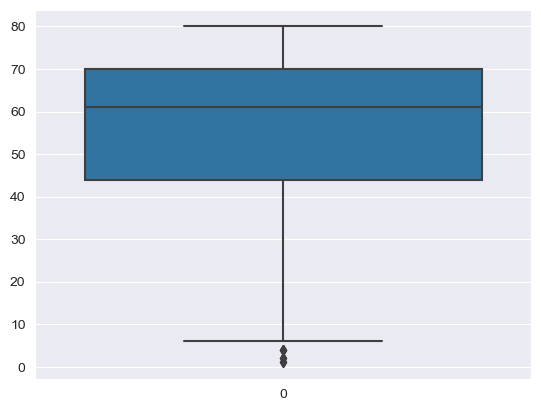

In [10]:
sns.boxplot(Toyota_data['Age_08_04'])

In [11]:
# split the variables as X and Y
Y = Toyota_data["Price"]
X = Toyota_data[['Age_08_04','KM','HP','cc','Weight']]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y,Y_pred)
print("Mean squared Error", mse.round(2))
import numpy as np
rmse = np.sqrt(mse)
print("Root Mean squared Error", rmse.round(2))

r2 = r2_score(Y,Y_pred)
print("R2_score", r2.round(2))

Mean squared Error 1815813.09
Root Mean squared Error 1347.52
R2_score 0.86


In [12]:
#X = Toyota_data[['Age_08_04','HP','cc','Weight']]
"""Mean squared Error 2143920.28
Root Mean squared Error 1464.21
R2_score 0.84"""

#X = Toyota_data[['Age_08_04','KM','HP','cc','Weight']]
"""Mean squared Error 1815813.09
Root Mean squared Error 1347.52
R2_score 0.86"""

#X = Toyota_data[['cc','Weight']]
"""Mean squared Error 8635328.46
Root Mean squared Error 2938.59
R2_score 0.34"""

#X = Toyota_data[['KM','HP','cc','Weight']]
"""Mean squared Error 4580854.54
Root Mean squared Error 2140.29
R2_score 0.65"""


#X = Toyota_data[['Age_08_04','KM']]
"""Mean squared Error 2760910.65
Root Mean squared Error 1661.6
R2_score 0.79"""

#X = Toyota_data[['KM','HP']]
"""Mean squared Error 8644573.8
Root Mean squared Error 2940.17
R2_score 0.34"""

#X = Toyota_data[['Age_08_04']]
"""Mean squared Error 3044403.46
Root Mean squared Error 1744.82
R2_score 0.77"""

'Mean squared Error 3044403.46\nRoot Mean squared Error 1744.82\nR2_score 0.77'

# Building the model

In [13]:
import statsmodels.formula.api as smf
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=Toyota_data).fit()

In [14]:
#coefficients
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [15]:
#t and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [16]:
#R squared values
(model.rsquared,model.rsquared_adj)  # r^2 is Accuraccy of a model and adj_r^2 is if it is increases then variabe is irrilavent

(0.8637627463428192, 0.8629989775766963)

# Simple Linear Regresions Models to check series of variables 

In [17]:
ml_1=smf.ols("Price~Age_08_04",data=Toyota_data).fit()
print(ml_1.tvalues, '\n', ml_1.pvalues)
(ml_1.rsquared,ml_1.rsquared_adj)

Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 
 Intercept    0.0
Age_08_04    0.0
dtype: float64


(0.7684108996825327, 0.7682494010072765)

In [18]:
ml_1=smf.ols("Price~KM",data=Toyota_data).fit()
print(ml_1.tvalues, '\n', ml_1.pvalues)
(model.rsquared,model.rsquared_adj)

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


(0.8637627463428192, 0.8629989775766963)

In [19]:
ml_2=smf.ols("Price~HP",data=Toyota_data).fit()
print(ml_2.tvalues, '\n', ml_2.pvalues)
(ml_2.rsquared,ml_2.rsquared_adj)

Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


(0.09921859277665879, 0.09859043279951563)

In [20]:
ml_3=smf.ols("Price~cc",data=Toyota_data).fit()
print(ml_3.tvalues, '\n', ml_3.pvalues)
(ml_3.rsquared,ml_3.rsquared_adj)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


(0.01597422921332259, 0.015288018773443546)

In [21]:
ml_4=smf.ols("Price~Doors",data=Toyota_data).fit()
print(ml_4.tvalues, '\n', ml_4.pvalues)
(ml_4.rsquared,ml_4.rsquared_adj)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


(0.03434555943109774, 0.03367216023962716)

In [22]:
ml_5=smf.ols("Price~Gears",data=Toyota_data).fit()
print(ml_5.tvalues, '\n', ml_5.pvalues)
(ml_5.rsquared,ml_5.rsquared_adj)

Intercept    1.814534
Gears        2.394401
dtype: float64 
 Intercept    0.069804
Gears        0.016775
dtype: float64


(0.003982096785360323, 0.0032875236310964118)

In [23]:
ml_6=smf.ols("Price~Quarterly_Tax",data=Toyota_data).fit()
print(ml_6.tvalues, '\n', ml_6.pvalues)
(ml_6.rsquared,ml_6.rsquared_adj)

Intercept        41.330311
Quarterly_Tax     8.507487
dtype: float64 
 Intercept        1.532168e-246
Quarterly_Tax     4.407393e-17
dtype: float64


(0.048047285674065465, 0.04738344138234596)

In [24]:
ml_7=smf.ols("Price~Weight",data=Toyota_data).fit()
print(ml_7.tvalues, '\n', ml_7.pvalues)
(ml_7.rsquared,ml_7.rsquared_adj)

Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


(0.33779063704356427, 0.33732884529812746)

In [25]:
ml_8=smf.ols("Price~Age_08_04+KM+HP+cc+Weight",data=Toyota_data).fit()
print(ml_8.tvalues, '\n', ml_8.pvalues)
(ml_8.rsquared,ml_8.rsquared_adj)

Intercept    -4.388629
Age_08_04   -46.664140
KM          -16.074606
HP           11.930907
cc           -0.988770
Weight       22.372752
dtype: float64 
 Intercept     1.224415e-05
Age_08_04    1.238049e-289
KM            1.418483e-53
HP            2.377142e-31
cc            3.229430e-01
Weight        2.638577e-95
dtype: float64


(0.861870305617451, 0.8613873346580715)

# Calculating VIF

In [26]:
import statsmodels.formula.api as smf

model1 = smf.ols('KM ~Age_08_04+HP+Doors+Quarterly_Tax+Gears+cc+Weight',data=Toyota_data).fit()
model1.rsquared

0.4308171891807999

In [27]:
model1_Vif = 1/(1-(model1.rsquared))
model1_Vif

1.7569047782042881

In [28]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     154.4
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          8.97e-170
Time:                        16:56:41   Log-Likelihood:                -16757.
No. Observations:                1436   AIC:                         3.353e+04
Df Residuals:                    1428   BIC:                         3.357e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.789e+04   2.98e+04     -2.618      0.009   -1.36e+05   -1.95e+04
Age_08_04      1140.0977     46.306     24.621      0.000    1049.263    1230.932
HP             -449.5668     58.349     -7.705      0.000    -564.026    -335.107
Doors           947.6637    844.925      1.122      0.262    -709.763    2605.090
Quarterly_Tax   263.2550     26.789      9.827      0.000     210.705     315.805
Gears           1.18e+04   4151.937      2.843      0.005    3659.869    1.99e+04
cc                5.1437      1.899      2.709      0.007       1.419       8.868
Weight           31.7609     22.549      1.409      0.159     -12.472      75.994
==============================================================================
Omnibus:                      174.970   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.214
Skew:                           0.770   Prob(JB):                     3.25e-72
Kurtosis:                       4.770   Cond. No.                     7.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
model2 = smf.ols('Age_08_04~KM+HP+Doors+Quarterly_Tax+Gears+cc+Weight',data=Toyota_data).fit()

model2.rsquared

0.4693889998414592

In [30]:
model3 = smf.ols('HP ~Age_08_04+KM+Doors+Quarterly_Tax+cc+Weight',data=Toyota_data).fit()
model4 = smf.ols('Doors ~Age_08_04+HP+Quarterly_Tax+Gears+Doors+cc+Weight',data=Toyota_data).fit()
model5 = smf.ols('Gears ~Age_08_04+HP+Quarterly_Tax+Doors+cc+Weight',data=Toyota_data).fit()
model6 = smf.ols('Weight ~Age_08_04+HP+Quarterly_Tax+Doors+Gears+cc+Weight',data=Toyota_data).fit()
model7 = smf.ols('cc ~Age_08_04+HP+Quarterly_Tax+Doors+Gears+cc+Weight',data=Toyota_data).fit()
model8 = smf.ols('Quarterly_Tax ~Age_08_04+HP+Gears+Doors+cc+Weight',data=Toyota_data).fit()


# Residual analysis

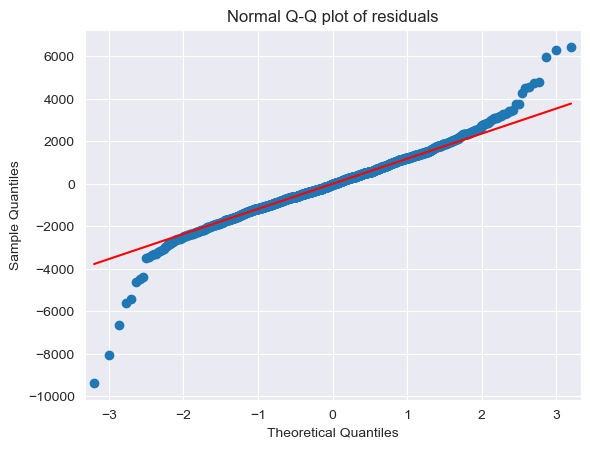

In [31]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') #line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [32]:
list(np.where(model.resid>4000)) #it show the which are the outliers by the graphs > 

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

In [33]:
#Residual plot for homoscedasticity it mean the data points are in non-linear
def get_standardized_values( vals ):
    return(vals - vals.mean())/vals.std()   #we are going to normalize the error by useing z-score

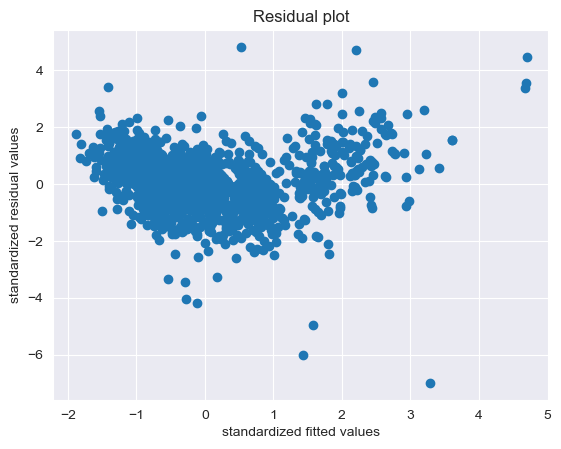

In [34]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title("Residual plot")
plt.xlabel("standardized fitted values")
plt.ylabel("standardized residual values")
plt.show()


# cook's distance

In [35]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

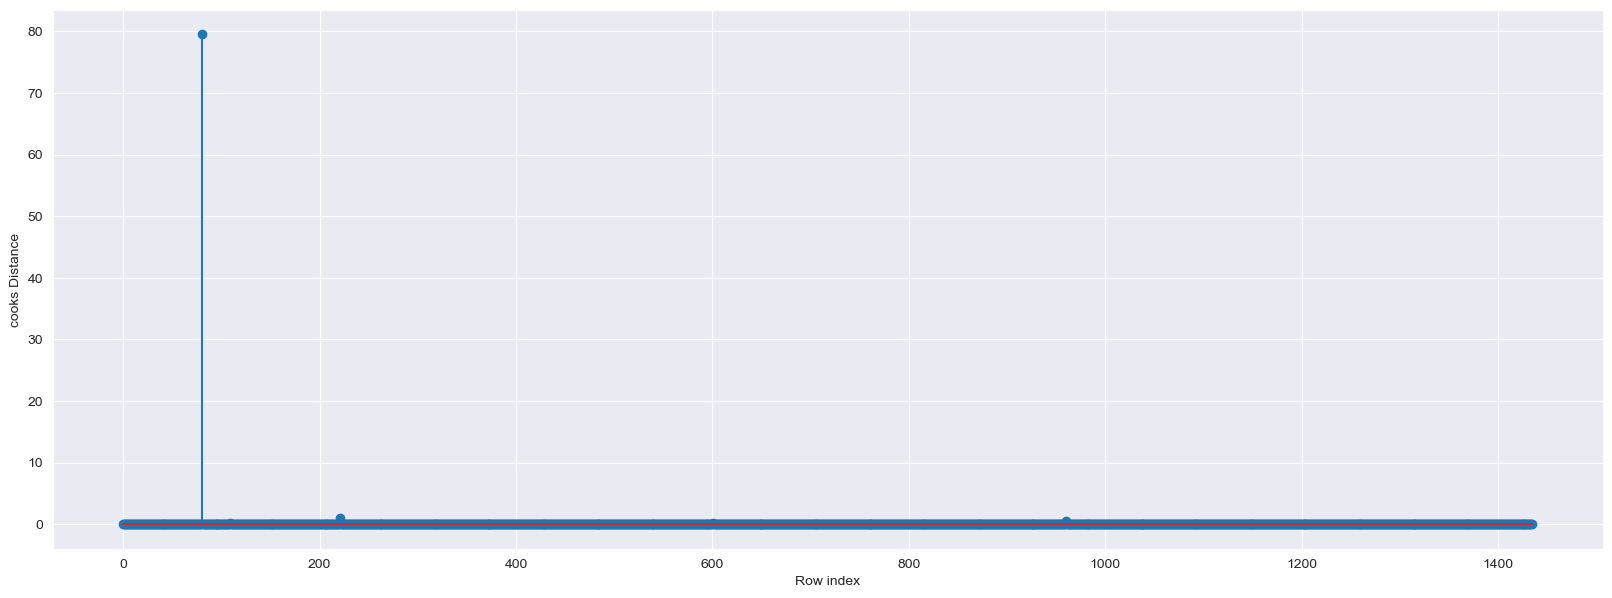

In [36]:
#plot the influcence values using stem plot
import matplotlib.pyplot as plt
import numpy as np
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Toyota_data)),np.round(c, 2)) #c is cooks distance
plt.xlabel("Row index")
plt.ylabel("cooks Distance")
plt.show()   # so the points which are far from the cook's distance that has to remove because it could be outlers or influence data point

In [37]:
#let find highest cooks distance value and index data point
#np.index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))  # output which is got that data point has to remove


(80, 79.52010624136568)

# High Influence point

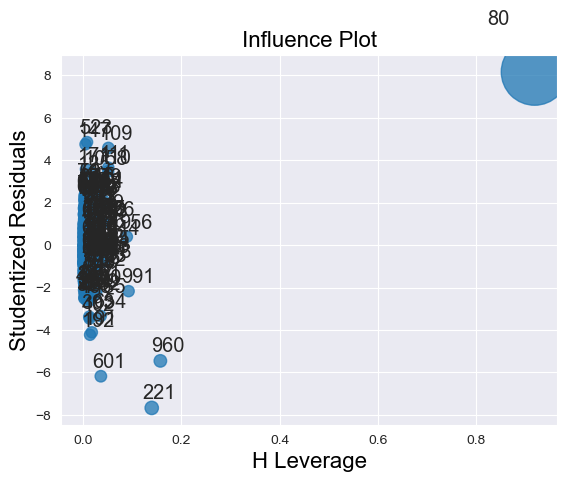

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show() 
# the points show based on the size of the data point so like high hat value that influence the regresion line 
#so 80 came out as influence data point as shown above in the cell

In [39]:
k = Toyota_data.shape[1]  # k is no.of columns
n = Toyota_data.shape[0]  # n is number of data points in it
leverage_cutoff = 3*((k + 1)/n)

In [40]:
leverage_cutoff # so 0.02 means as in plot there is only one which is 80

0.08147632311977715

# From above plot, it is evident that data point 80 is influencers 

In [41]:
Toyota_data[Toyota_data.index.isin([922,956,991,80])] #this record should be pulled

Id                                              Model  Price  Age_08_04  \
80    81                TOYOTA Corolla 1.6 5drs 1 4/5-Doors  18950         25   
922  926  TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...   9950         63   
956  960       TOYOTA Corolla 1.6 Linea Luna Aut. 4/5-Doors  10950         58   
991  996        TOYOTA Corolla 1.6 Lin.Terra Aut. 4/5-Doors   7950         58   

     Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ... Central_Lock  \
80           8      2002  20019    Petrol  110          1  ...            1   
922          6      1999  57000    Petrol  110          1  ...            0   
956         11      1999  51421    Petrol  110          0  ...            1   
991         11      1999  43000       CNG  110          1  ...            1   

     Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
80                 1               1      0          0            0   
922                0               1      0          0            1   
956                1               1      0          0            0   
991                1               1      0          0            0   

     Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
80                  0             0               0        0  
922                 1             0               0        0  
956                 0             0               0        0  
991                 0             0               0        0  

[4 rows x 38 columns]

In [42]:
Toyota_data.head(10)

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   
5   6     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  12950         32   
6   7   TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  16900         27   
7   8   TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  18600         30   
8   9     TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors  21500         27   
9  10     TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors  12950         23   

   Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel   90          1  ...            1   
1         10      2002  72937    Diesel   90          1  ...            1   
2          9      2002  41711    Diesel   90          1  ...            0   
3          7      2002  48000    Diesel   90          0  ...            0   
4          3      2002  38500    Diesel   90          0  ...            1   
5          1      2002  61000    Diesel   90          0  ...            1   
6          6      2002  94612    Diesel   90          1  ...            1   
7          3      2002  75889    Diesel   90          1  ...            1   
8          6      2002  19700    Petrol  192          0  ...            1   
9         10      2002  71138    Diesel   69          0  ...            0   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   
5                1               1      0          1            0   
6                1               1      0          0            1   
7                1               1      0          0            0   
8                1               1      1          0            0   
9                0               1      0          0            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  
5                 1             0               0        0  
6                 1             0               0        0  
7                 1             0               0        0  
8                 0             1               1        0  
9                 1             0               0        0  

[10 rows x 38 columns]

# improving the model

In [45]:
#load the data
Toyota_new = pd.read_csv("ToyotaCorolla.csv", encoding="latin-1")


In [46]:
#Discard the data points which are influences and reassign the row number (reset_index())
car1=Toyota_new.drop(Toyota_new.index[[80]],axis=0).reset_index()

In [47]:
#drop the original index
car1=car1.drop(['index'],axis=1)


In [48]:
car1

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1430  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1431  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1432  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1433  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1434  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1430         69         12      1998  20544    Petrol   86          1  ...   
1431         72          9      1998  19000    Petrol   86          0  ...   
1432         71         10      1998  17016    Petrol   86          0  ...   
1433         70         11      1998  16916    Petrol   86          1  ...   
1434         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1430            1                1               1      0          1   
1431            0                0               1      0          0   
1432            0                0               1      0          0   
1433            0                0               0      0          0   
1434            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1430            1                 1             0               0        0  
1431            1                 1             0               0        0  
1432            0                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 0             0               0        0  

[1435 rows x 38 columns]

# build Model

In [49]:
#excluding variable "Doors	Gears	Quarterly_Tax" and gernarate R-squared and AIC values
final_ml_v = smf.ols("Price ~Age_08_04+KM+HP+cc+Weight",data=car1).fit()

In [50]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.8645947090820577, 24732.90200636056)

# Predicting for new data

In [51]:
New_data = pd.DataFrame({'Age_08_04':37,'KM':1700,'HP':67,'cc':1400,'Weight':1088},index=[1])

In [52]:
New_data

Age_08_04    KM  HP    cc  Weight
1         37  1700  67  1400    1088

In [53]:
final_ml_v.predict(New_data)

1    13664.212171
dtype: float64